# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
Note 1: in this data you can see number of positive points >> number of negatives points
Note 2: use pandas or numpy to read the data from 5_a.csv
Note 3: you need to derive the class labels from given score $y^{pred}= {[0 if y_score < 0.5 else 1]}$

 Compute Confusion Matrix 
 Compute F1 Score
 Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array)  Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
Compute Accuracy Score 


In [3]:
df_a=pd.read_csv('5_a.csv')
df_a.to_csv('hh.csv')

In [4]:
# write your code here for task A
df_a['y_pred'] = df_a['proba'].apply(lambda x: 0 if x<0.5 else 1)

In [5]:
df_a.y.value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

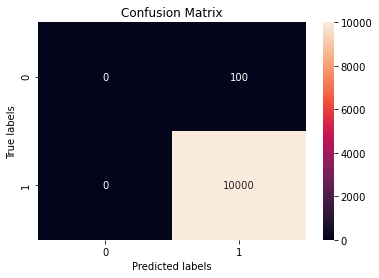

In [95]:
#Confusion Matrix:
tn = df_a[(df_a['y_pred'] == 0) & (df_a['y'] == 0)].shape[0]
fn = df_a[(df_a['y_pred'] == 0) & (df_a['y'] == 1)].shape[0]
fp = df_a[(df_a['y_pred'] == 1) & (df_a['y'] == 0)].shape[0]
tp = df_a[(df_a['y_pred'] == 1) & (df_a['y'] == 1)].shape[0]

n = np.array([tn,fp,fn,tp])
n = n.reshape(-1,2)

ax= plt.subplot()
sns.heatmap(n, annot=True, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [96]:
pr = tp/(tp+fp)
print('precision:',pr)
re = tp/(fn+tp)
print('recall:',re)
f1 = 2*(pr*re/(pr+re))
print('f1 score',f1)

precision: 0.9900990099009901
recall: 1.0
f1 score 0.9950248756218906


In [101]:
#Accuracy Score
acc_score = (tp+tn)/(tp+fp+fn+tn)

In [102]:
print('accuracy:',acc_score)

accuracy: 0.9900990099009901


In [103]:
df = df_a.sort_values(by=['proba'],ascending=False).reset_index()

In [104]:
tpr_array = list()
fpr_array = list()
for i in list(df.proba.unique()):
    df['y_pred'] = df['proba'].apply(lambda x: 0 if x<i else 1)
    #print(i)
    tn = df[(df['y_pred'] == 0) & (df['y'] == 0)].shape[0]
    fn = df[(df['y_pred'] == 0) & (df['y'] == 1)].shape[0]
    fp = df[(df['y_pred'] == 1) & (df['y'] == 0)].shape[0]
    tp = df[(df['y_pred'] == 1) & (df['y'] == 1)].shape[0]
    tpr = tp/(fn+tp)
    fpr = fp/(tn+fp)
    tpr_array.append(tpr)
    fpr_array.append(fpr)

In [105]:
np.trapz(tpr_array, fpr_array)

0.48829900000000004

In [ ]:
B. Compute performance metrics for the given data '5_b.csv'
   Note 1: in this data you can see number of positive points << number of negatives points
   Note 2: use pandas or numpy to read the data from 5_b.csv
   Note 3: you need to derive the class labels from given score
𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] 

 Compute Confusion Matrix 

 Compute F1 Score 

 Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) https://stackoverflow.com/q/53603376/4084039, https://stackoverflow.com/a/39678975/4084039
Note- Make sure that you arrange your probability scores in descending order while calculating AUC

 Compute Accuracy Score 

In [115]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [116]:
# write your code here for task B
df_b['y_pred'] = df_b['proba'].apply(lambda x: 0 if x<0.5 else 1)

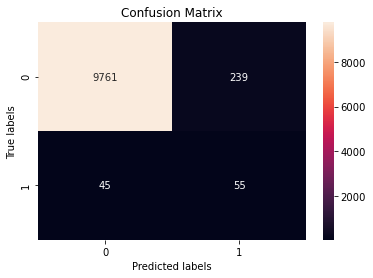

In [123]:
#Confusion Matrix:
tn = df_b[(df_b['y_pred'] == 0) & (df_b['y'] == 0)].shape[0]
fn = df_b[(df_b['y_pred'] == 0) & (df_b['y'] == 1)].shape[0]
fp = df_b[(df_b['y_pred'] == 1) & (df_b['y'] == 0)].shape[0]
tp = df_b[(df_b['y_pred'] == 1) & (df_b['y'] == 1)].shape[0]

n = np.array([tn,fp,fn,tp])
n = n.reshape(-1,2)

ax= plt.subplot()
sns.heatmap(n, annot=True, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [124]:
#f1 score
pr = tp/(tp+fp)
print('precision:',pr)
re = tp/(fn+tp)
print('recall:',re)
f1 = 2*((pr*re)/(pr+re))
print('f1 score',f1)

precision: 0.1870748299319728
recall: 0.55
f1 score 0.2791878172588833


In [125]:
df = df_b.sort_values(by=['proba'],ascending=False).reset_index()

In [120]:
tpr_array = list()
fpr_array = list()
for i in list(df.proba.unique()):
    df['y_pred'] = df['proba'].apply(lambda x: 0 if x<i else 1)
   
    tn = df[(df['y_pred'] == 0) & (df['y'] == 0)].shape[0]
    fn = df[(df['y_pred'] == 0) & (df['y'] == 1)].shape[0]
    fp = df[(df['y_pred'] == 1) & (df['y'] == 0)].shape[0]
    tp = df[(df['y_pred'] == 1) & (df['y'] == 1)].shape[0]
    tpr = tp/(fn+tp)
    fpr = fp/(tn+fp)
    tpr_array.append(tpr)
    fpr_array.append(fpr)

In [121]:
np.trapz(tpr_array, fpr_array)

0.9377570000000001

In [ ]:
C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data

you will be predicting label of a data points like this:  𝑦𝑝𝑟𝑒𝑑=[0 if y_score < threshold else 1] 
𝐴=500×number of false negative+100×numebr of false positive 
   Note 1: in this data you can see number of negative points > number of positive points
   Note 2: use pandas or numpy to read the data from 5_c.csv

In [27]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [29]:
 # write your code for task C
li = list()
for i in list(df_c.prob.unique()):
    l = list()
    df_c['y_pred'] = df_c['prob'].apply(lambda x: 0 if x< i else 1)
    fn = df_c[(df_c['y_pred'] == 0) & (df_c['y'] == 1)].shape[0]
    fp = df_c[(df_c['y_pred'] == 1) & (df_c['y'] == 0)].shape[0]
    
    l.append(i)
    l.append((500*fn) + (100*fp))
    #print(l)
    li.append(l)

In [30]:
d = pd.DataFrame(columns = ['Threshold','Score'], data = li)

In [31]:
d_f = d.sort_values(by=['Score']).reset_index()

In [32]:
#Minimum Threshold that gives low metric A
d_f['Threshold'].iloc[0:1]

0    0.230039
Name: Threshold, dtype: float64

In [34]:
D. Compute performance metrics(for regression) for the given data 5_d.csv
    Note 2: use pandas or numpy to read the data from 5_d.csv
    Note 1: 5_d.csv will having two columns Y and predicted_Y both are real valued features

 Compute Mean Square Error 

 Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk

 Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [46]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [48]:
 # write your code for task 5d
#Mean Squared Error:
c=0
for i,j in zip(df_d['y'].values.tolist(),df_d['pred'].values.tolist()):
    c+=np.square(j-i)
mse = c/df_d.shape[0]
print('MSE:',mse)
#MAPE
c=0
for i,j in zip(df_d['y'].values.tolist(),df_d['pred'].values.tolist()):
    c+=abs(i-j)
mape = c/df_d.y.sum() * 100
print('MAPE:',mape)
#R2
ss_res=0
ss_tot = 0
y_mean = np.mean(df_d['y'])
for i,j in zip(df_d['y'].values.tolist(),df_d['pred'].values.tolist()):
    ss_res+=np.square(i-j)
    ss_tot+=np.square(i-y_mean)
R2 = 1- (ss_res/ss_tot)
print('R2:',R2)

MSE: 177.16569974554707
MAPE: 12.91202994009687
R2: 0.9563582786990964
